![download.png](download.png)


## Import Packages

In [40]:
#Import Python packages
import pandas as pd
import plotly.express as px
import json
import sys
import cachetools
import matplotlib.pyplot as plt

# Import Snowflake modules
from snowflake.snowpark import Session
import snowflake.snowpark.functions as F
import snowflake.snowpark.types as T
from snowflake.snowpark import Window

## Connect to Snowflake

In [2]:
# Get account credentials from a json file

#Ryan Liam: To create a json file?
'''with open("data_scientist_auth.json") as f:
    data = json.load(f)
    username = data["username"]
    password = data["password"]
    account = data["account"]'''

# Specify connection parameters
connection_parameters = {
    "account": 'OIBYVZR-PJ46704',
    "user": 'RYANLIAM',
    "password": 'Cats2004',
    "role": "tasty_data_scientist",
    "warehouse": "tasty_ds_wh",
    "database": "frostbyte_tasty_bytes",
    "schema": "analytics",
}

# Create Snowpark session
session = Session.builder.configs(connection_parameters).create()

## Gathering Data as Snowpark DataFrame

In [3]:
#Country
tasty_bytes_country = session.table("frostbyte_tasty_bytes.raw_pos.country")
#Franchise
tasty_bytes_franchise = session.table("frostbyte_tasty_bytes.raw_pos.franchise")
#Location
tasty_bytes_location = session.table("frostbyte_tasty_bytes.raw_pos.location")
#Menu
tasty_bytes_menu = session.table("frostbyte_tasty_bytes.raw_pos.menu")
#Order Detail
tasty_bytes_order_detail = session.table("frostbyte_tasty_bytes.raw_pos.order_detail")
#Order Header
tasty_bytes_order_header = session.table("frostbyte_tasty_bytes.raw_pos.order_header")
#Truck
tasty_bytes_truck = session.table("frostbyte_tasty_bytes.raw_pos.truck")
#Customer Loyalty
tasty_bytes_customer_loyalty = session.table("frostbyte_tasty_bytes.raw_customer.customer_loyalty")


## Preview The Data

In [4]:
print("Number of rows:", tasty_bytes_country.count())
tasty_bytes_country.show()

Number of rows: 30
--------------------------------------------------------------------------------------------------------------
|"COUNTRY_ID"  |"COUNTRY"  |"ISO_CURRENCY"  |"ISO_COUNTRY"  |"CITY_ID"  |"CITY"          |"CITY_POPULATION"  |
--------------------------------------------------------------------------------------------------------------
|1             |Australia  |AUD             |AU             |10026      |Sydney          |5231147            |
|1             |Australia  |AUD             |AU             |10013      |Melbourne       |4917750            |
|2             |Brazil     |BRL             |BR             |10022      |Sao Paulo       |12400232           |
|2             |Brazil     |BRL             |BR             |10020      |Rio de Janeiro  |6747815            |
|3             |Canada     |CAD             |CA             |10014      |Montreal        |1762949            |
|3             |Canada     |CAD             |CA             |10028      |Toronto         |279

In [5]:
print("Number of rows:", tasty_bytes_franchise.count())
tasty_bytes_franchise.show()

Number of rows: 335
--------------------------------------------------------------------------------------------------------------------------
|"FRANCHISE_ID"  |"FIRST_NAME"  |"LAST_NAME"  |"CITY"     |"COUNTRY"      |"E_MAIL"                     |"PHONE_NUMBER"  |
--------------------------------------------------------------------------------------------------------------------------
|1               |Corporate     |Owned        |San Mateo  |United States  |TastyBytes@Gmail.com         |434-928-2233    |
|2               |Annette       |Gates        |San Mateo  |United States  |Annette.Gates@yahoo.com      |949-148-5165    |
|3               |Steven        |Phelps       |San Mateo  |United States  |Steven.Phelps@aol.com        |746-288-2047    |
|4               |Sandra        |Dunn         |San Mateo  |United States  |Sandra.Dunn@ymail.com        |043-798-0237    |
|5               |Diane         |Cruz         |San Mateo  |United States  |Diane.Cruz@gmail.com         |850-879-6541  

In [6]:
print("Number of rows:", tasty_bytes_location.count())
tasty_bytes_location.show()

Number of rows: 13093
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"LOCATION_ID"  |"PLACEKEY"           |"LOCATION"                                          |"CITY"      |"REGION"                               |"ISO_COUNTRY_CODE"  |"COUNTRY"  |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1001           |222-222@4hf-nch-k2k  |Seasoners Fine Foods                                |Manchester  |Greater Manchester                     |GB                  |England    |
|1002           |222-222@4hf-ndn-4sq  |HM Music Promotions                                 |Manchester  |Greater Manchester                     |GB                  |England    |
|1003           |222-222@4hf-ndp-grk  |G J Hull                                    

In [7]:
print("Number of rows:", tasty_bytes_menu.count())
tasty_bytes_menu.show()

Number of rows: 100
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"MENU_ID"  |"MENU_TYPE_ID"  |"MENU_TYPE"  |"TRUCK_BRAND_NAME"  |"MENU_ITEM_ID"  |"MENU_ITEM_NAME"    |"ITEM_CATEGORY"  |"ITEM_SUBCATEGORY"  |"COST_OF_GOODS_USD"  |"SALE_PRICE_USD"  |"MENU_ITEM_HEALTH_METRICS_OBJ"     |
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|10001      |1               |Ice Cream    |Freezing Point      |10              |Lemonade            |Beverage         |Cold Option         |0.6500               |3.5000            |{                                  |
|           |                |             |                    |                |                  

In [8]:
print("Number of rows:", tasty_bytes_order_detail.count())
tasty_bytes_order_detail.show()

Number of rows: 673655465
--------------------------------------------------------------------------------------------------------------------------------------------------------
|"ORDER_DETAIL_ID"  |"ORDER_ID"  |"MENU_ITEM_ID"  |"DISCOUNT_ID"  |"LINE_NUMBER"  |"QUANTITY"  |"UNIT_PRICE"  |"PRICE"  |"ORDER_ITEM_DISCOUNT_AMOUNT"  |
--------------------------------------------------------------------------------------------------------------------------------------------------------
|757380337          |405331986   |113             |NULL           |1              |2           |14.0000       |28.0000  |NULL                          |
|757380338          |405331987   |112             |NULL           |0              |1           |12.0000       |12.0000  |NULL                          |
|757380339          |405331987   |113             |NULL           |1              |3           |14.0000       |42.0000  |NULL                          |
|757380340          |405331987   |111             |NULL 

In [9]:
print("Number of rows:", tasty_bytes_order_header.count())
tasty_bytes_order_header.show()

Number of rows: 248201269
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"ORDER_ID"  |"TRUCK_ID"  |"LOCATION_ID"  |"CUSTOMER_ID"  |"DISCOUNT_ID"  |"SHIFT_ID"  |"SHIFT_START_TIME"  |"SHIFT_END_TIME"  |"ORDER_CHANNEL"  |"ORDER_TS"           |"SERVED_TS"  |"ORDER_CURRENCY"  |"ORDER_AMOUNT"  |"ORDER_TAX_AMOUNT"  |"ORDER_DISCOUNT_AMOUNT"  |"ORDER_TOTAL"  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|14271673    |90          |2666.0         |NULL           |NULL           |63645       |15:30:00            |22:30:00          |

In [10]:
print("Number of rows:", tasty_bytes_truck.count())
tasty_bytes_truck.show()

Number of rows: 450
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"TRUCK_ID"  |"MENU_TYPE_ID"  |"PRIMARY_CITY"  |"REGION"    |"ISO_REGION"  |"COUNTRY"      |"ISO_COUNTRY_CODE"  |"FRANCHISE_FLAG"  |"YEAR"  |"MAKE"        |"MODEL"           |"EV_FLAG"  |"FRANCHISE_ID"  |"TRUCK_OPENING_DATE"  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1           |1               |San Mateo       |California  |CA            |United States  |US                  |0                 |2009    |Ford_         |Step Van          |0          |1               |2019-01-01            |
|2           |2               |San Mateo       |California  |CA     

In [11]:
print("Number of rows:", tasty_bytes_customer_loyalty.count())
tasty_bytes_customer_loyalty.show()

Number of rows: 222540
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"CUSTOMER_ID"  |"FIRST_NAME"  |"LAST_NAME"  |"CITY"          |"COUNTRY"  |"POSTAL_CODE"  |"PREFERRED_LANGUAGE"  |"GENDER"     |"FAVOURITE_BRAND"  |"MARITAL_STATUS"  |"CHILDREN_COUNT"  |"SIGN_UP_DATE"  |"BIRTHDAY_DATE"  |"E_MAIL"                  |"PHONE_NUMBER"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|1              |Rodolfo       |Tucker       |Hamburg         |Germany    |21129          |German                |Female       |NULL               |Single            |0           

## Data Exploration

In [12]:
tasty_bytes_order_header=tasty_bytes_order_header.drop('ORDER_DISCOUNT_AMOUNT', 'ORDER_TAX_AMOUNT', 'ORDER_CHANNEL', 'SERVED_TS', 'DISCOUNT_ID' )

In [13]:
tasty_bytes_order_detail=tasty_bytes_order_detail.drop('ORDER_ITEM_DISCOUNT_AMOUNT', 'DISCOUNT_ID')

In [14]:
tasty_bytes_customer_loyalty=tasty_bytes_customer_loyalty.drop('FAVOURITE_BRAND')

In [23]:
tasty_bytes_order_header.where(F.col('CUSTOMER_ID')==1).show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"ORDER_ID"  |"TRUCK_ID"  |"LOCATION_ID"  |"CUSTOMER_ID"  |"SHIFT_ID"  |"SHIFT_START_TIME"  |"SHIFT_END_TIME"  |"ORDER_TS"           |"ORDER_CURRENCY"  |"ORDER_AMOUNT"  |"ORDER_TOTAL"  |
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|386457962   |368         |4644.0         |1              |200404684   |08:30:00            |14:30:00          |2020-12-10 12:43:46  |USD               |98.0000         |98.0000        |
|386575445   |361         |13460.0        |1              |200404971   |15:30:00            |22:30:00          |2021-01-07 19:13:08  |USD               |5.0000          |5.0000         |
|389786685   |365         |8077.0         |1              |200411

In [40]:
tasty_bytes_order_header.group_by('SHIFT_START_TIME',"SHIFT_END_TIME").count().order_by("COUNT").show()

----------------------------------------------------
|"SHIFT_START_TIME"  |"SHIFT_END_TIME"  |"COUNT"   |
----------------------------------------------------
|09:00:00            |15:00:00          |22059682  |
|16:00:00            |23:00:00          |26819987  |
|08:30:00            |14:30:00          |33848580  |
|15:30:00            |22:30:00          |40631827  |
|08:00:00            |14:00:00          |57114439  |
|15:00:00            |22:00:00          |67726754  |
----------------------------------------------------



In [25]:
merged_df = tasty_bytes_order_detail.join(
    right=tasty_bytes_order_header,
    on="ORDER_ID",
    how="inner"
)
print("Number of rows:", merged_df.count())
merged_df.show()

Number of rows: 673655465
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"ORDER_ID"  |"ORDER_DETAIL_ID"  |"MENU_ITEM_ID"  |"LINE_NUMBER"  |"QUANTITY"  |"UNIT_PRICE"  |"PRICE"  |"TRUCK_ID"  |"LOCATION_ID"  |"CUSTOMER_ID"  |"SHIFT_ID"  |"SHIFT_START_TIME"  |"SHIFT_END_TIME"  |"ORDER_TS"           |"ORDER_CURRENCY"  |"ORDER_AMOUNT"  |"ORDER_TOTAL"  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|405332097   |757380613          |122             |0              |1           |12.0000       |12.0000  |402         |13111.0        |NULL  

In [26]:
merged_df_2 = merged_df.join(
    right=tasty_bytes_menu,
    on="MENU_ITEM_ID",
    how="inner"
)
print("Number of rows:", merged_df_2.count())
merged_df_2=merged_df_2.drop('SALE_PRICE_USD','MENU_ITEM_HEALTH_METRICS_OBJ')
merged_df_2.show()

Number of rows: 673655465
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"MENU_ITEM_ID"  |"ORDER_ID"  |"ORDER_DETAIL_ID"  |"LINE_NUMBER"  |"QUANTITY"  |"UNIT_PRICE"  |"PRICE"  |"TRUCK_ID"  |"LOCATION_ID"  |"CUSTOMER_ID"  |"SHIFT_ID"  |"SHIFT_START_TIME"  |"SHIFT_END_TIME"  |"ORDER_TS"           |"ORDER_CURRENCY"  |"ORDER_AMOUNT"  |"ORDER_TOTAL"  |"MENU_ID"  |"MENU_TYPE_ID"  |"MENU_TYPE"  |"TRUCK_BRAND_NAME"    |"MENU_ITEM_NAME"  |"ITEM_CATEGORY"  |"ITEM_SUBCATEGORY"  |"COST_OF_GOODS_USD"  |
------------------------------------------------------------------------------------------------------------------------------

In [34]:
truck_and_menu=tasty_bytes_truck.join(
    right=tasty_bytes_menu,
    on="MENU_TYPE_ID",
    how="inner"
)

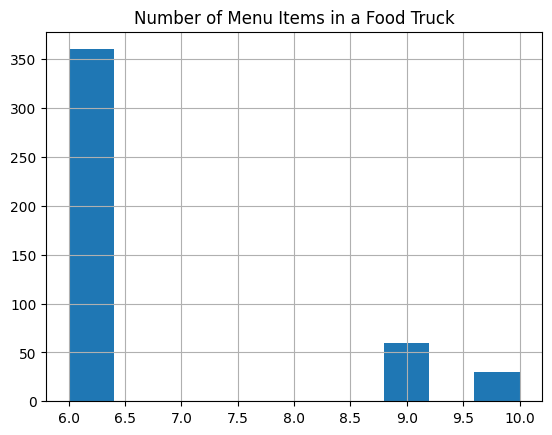

In [42]:
truck_and_menu.group_by('TRUCK_ID').count().to_pandas().hist('COUNT')
plt.title('Number of Menu Items in a Food Truck')
plt.show()